<a href="https://colab.research.google.com/github/ysg1202/scikit_learn/blob/main/classfication_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem description
- 목적: 수기로 씌어진 0-9까지의 숫자 이미지로부터 해당 숫자 식별 (ex. '1' > 1)

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# 2. Digits dataset
- scikit-learn 라이브러리에서 이미지 분류 실습을 위해 제공되는 기본 데이터셋
- Image size: 8-by-8 pixel (grayscale)
- Sample 갯수: 1,797개
- Classes: 10 (0-9)
- Feature format (학습을 위한 데이터 형태): 1d array of 64 pixel values
- Target (모델의 추론 결과): 0-9 사이 정수

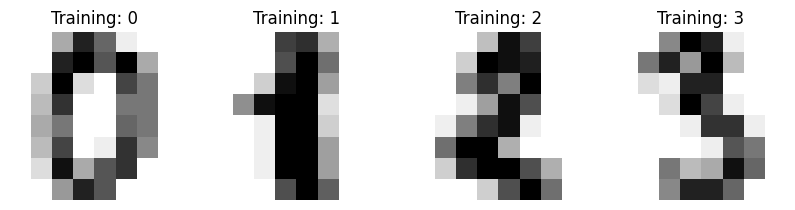

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target): # 일부 이미지 시현
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# 3. Classification
주어진 이미지를 0~9까지의 정수로 분류하기 위한 절차

1. 이미지를 1D array로 변환
- why? scikit-learn에서 학습 데이터는 (n_samples, n_features) 의 2차원 배열 형태
- 각 sample은 1차원 배열로 간주됨
2. 전체 데이터셋을 학습 데이터(train subsets)와  
 테스트 데이터(test subsets)로 구분

3. fit() method 호출 > 모델 학습

4. predict() method 호출 > 테스트 데이터를 이용한 추론

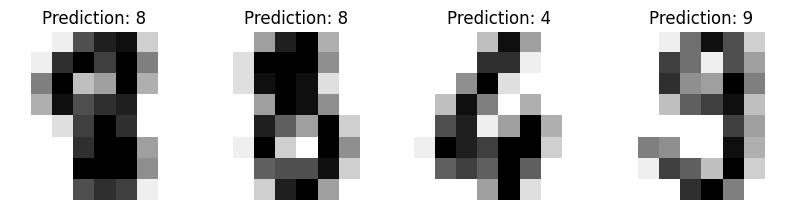

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # 1차원 배열로 바꿈

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


# 추론 결과 중 일부 시각화
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

# 4. Model Evaluation
추론 결과와 정답 데이터로부터 모델의 분류 (classification) 성능 평가

sklearn.metrics module: 모델 성능 평가를 위한 method 제공

- classification metrics: 모델이 분류를 얼마나 잘 했는가?
- classification_report(): 분류 성능 측정 결과 출력
- regression metrics: 모델이 수치 예측을 얼마나 잘 했는가?
- clustering metrics: 모델이 군집화를 얼마나 잘 했는가?
...
- precision, recall, f1-score, support

- confusion matrix

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


